# CS 6220 Data Mining — Assignment 5

# Clustering: Agglomerative and K-Means Clustering

Load the Dataset and Remove Unnecessary Features:

In [4]:
from sklearn.datasets import load_iris
import pandas as pd

# Load the dataset
iris = load_iris()

# Create a dataframe and keep only Sepal Length and Sepal Width
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data = data[['sepal length (cm)', 'sepal width (cm)']]

# Convert the data to a NumPy array for clustering
data_array = data.values


# 1. Show dendrogram of the iris data using hierarchical clustering using the ward method.

Dendrogram Using Hierarchical Clustering (Ward Method):
* Use the Ward method in agglomerative clustering to produce the dendrogram.
* This will help identify an optimal number of clusters (k) by visually inspecting the dendrogram and selecting a horizontal cut that gives a reasonable number of clusters.

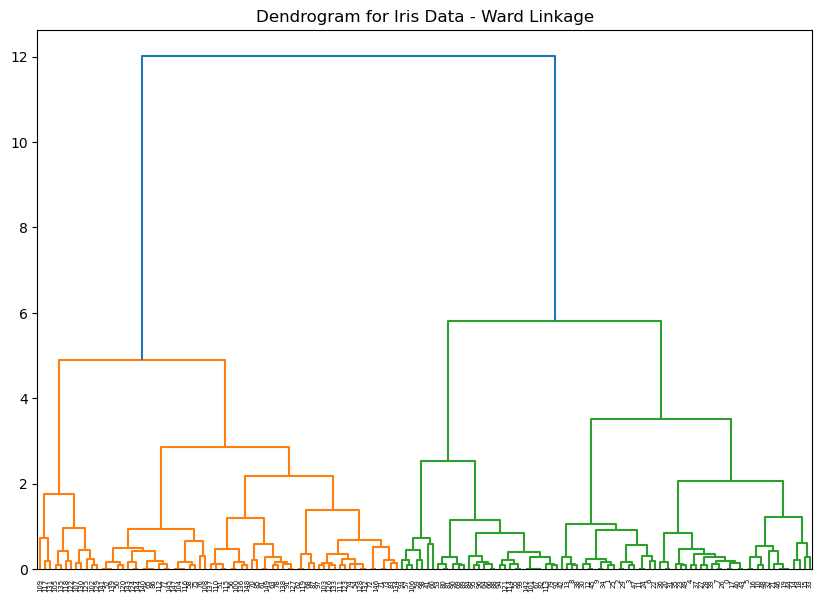

In [8]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the iris dataset and select Sepal Length and Sepal Width
iris = load_iris()
data = iris.data[:, :2]

# Plot the dendrogram for Ward linkage
plt.figure(figsize=(10, 7))
plt.title("Dendrogram for Iris Data - Ward Linkage")
dendrogram = shc.dendrogram(shc.linkage(data, method='ward'))
plt.show()


# 2. Scatter plots of the data in 2d showing the clusters in different colors using Agglomerative Clustering for different k values. Show the plots side by side for ward and complete linkage.

Agglomerative Clustering with Ward and Complete Linkage: Now that we have the dendrogram, pick a few cluster numbers (k), such as 2, 3, 4, etc., and plot the clusters formed using both Ward and Complete linkage.

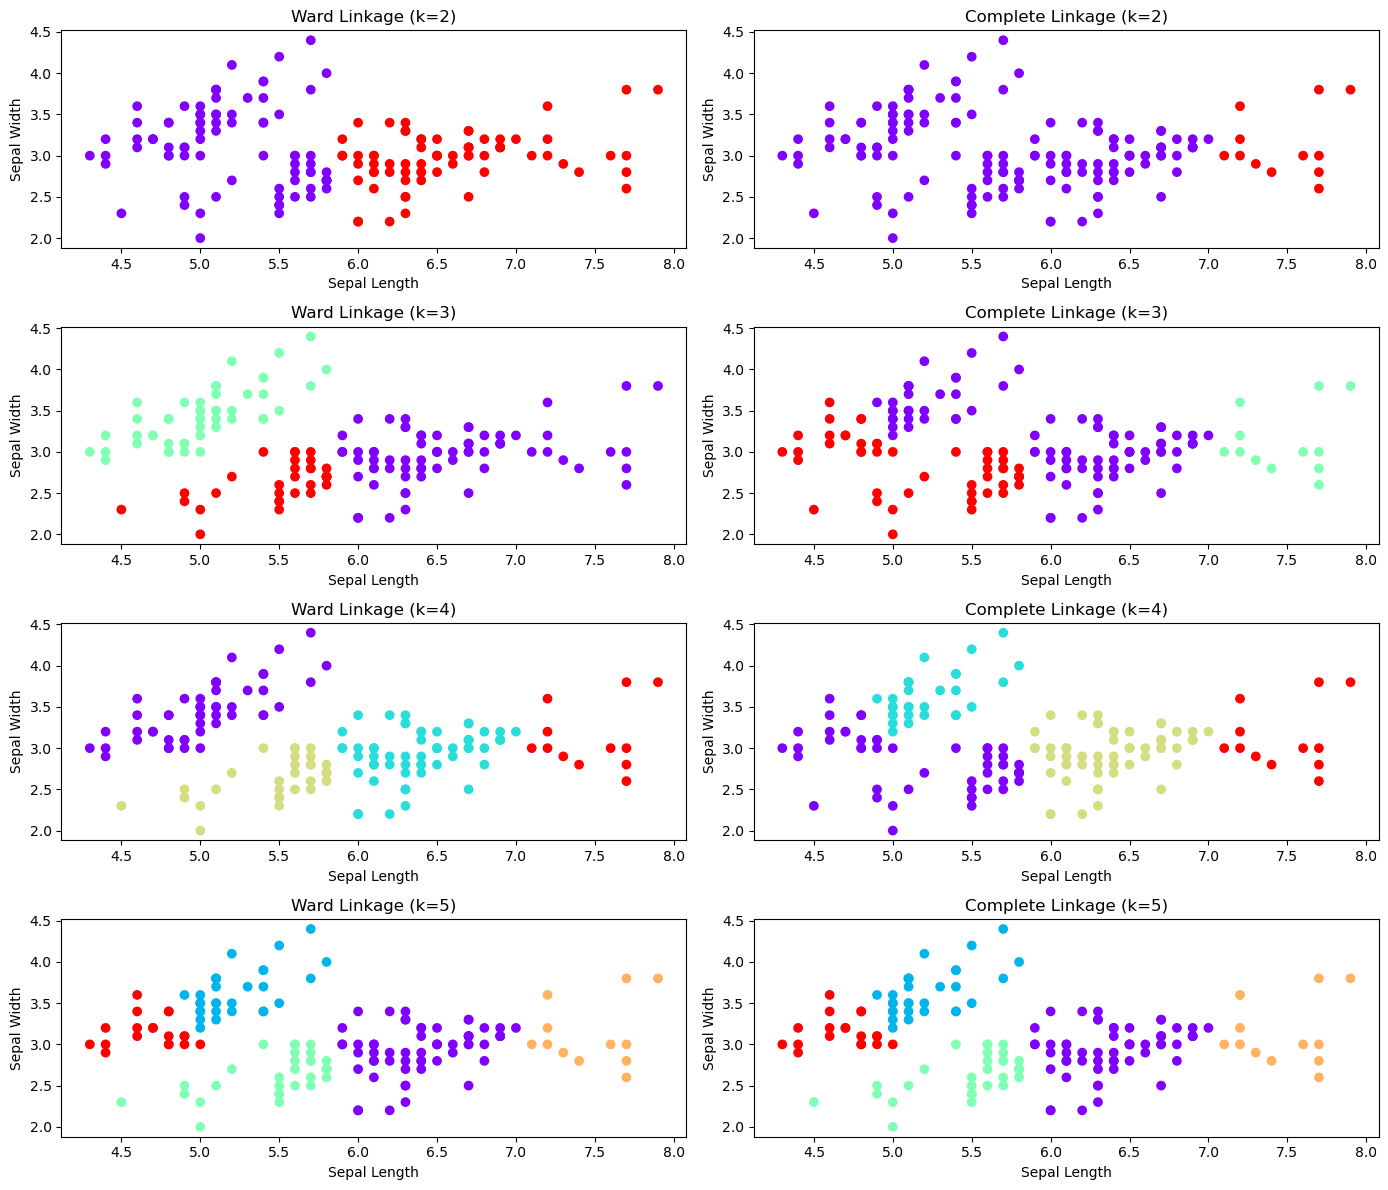

In [11]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Function to plot clusters for a specific linkage and k value
def plot_clusters(data, labels, title):
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='rainbow')
    plt.title(title)
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')

# List of k values to use
k_values = [2, 3, 4, 5]

# Create subplots for different k values
plt.figure(figsize=(14, 12))

for i, k in enumerate(k_values):
    # Perform Agglomerative Clustering for Ward Linkage
    ward_cluster = AgglomerativeClustering(n_clusters=k, linkage='ward')
    ward_labels = ward_cluster.fit_predict(data)

    # Perform Agglomerative Clustering for Complete Linkage
    complete_cluster = AgglomerativeClustering(n_clusters=k, linkage='complete')
    complete_labels = complete_cluster.fit_predict(data)

    # Plot for Ward Linkage
    plt.subplot(4, 2, 2*i+1)
    plot_clusters(data, ward_labels, f"Ward Linkage (k={k})")

    # Plot for Complete Linkage
    plt.subplot(4, 2, 2*i+2)
    plot_clusters(data, complete_labels, f"Complete Linkage (k={k})")

plt.tight_layout()
plt.show()


# 3. Scatter plot of the data in 2d showing the clusters in different colors using K-Means clustering for different k values. Also show the cluster centers in the plot.

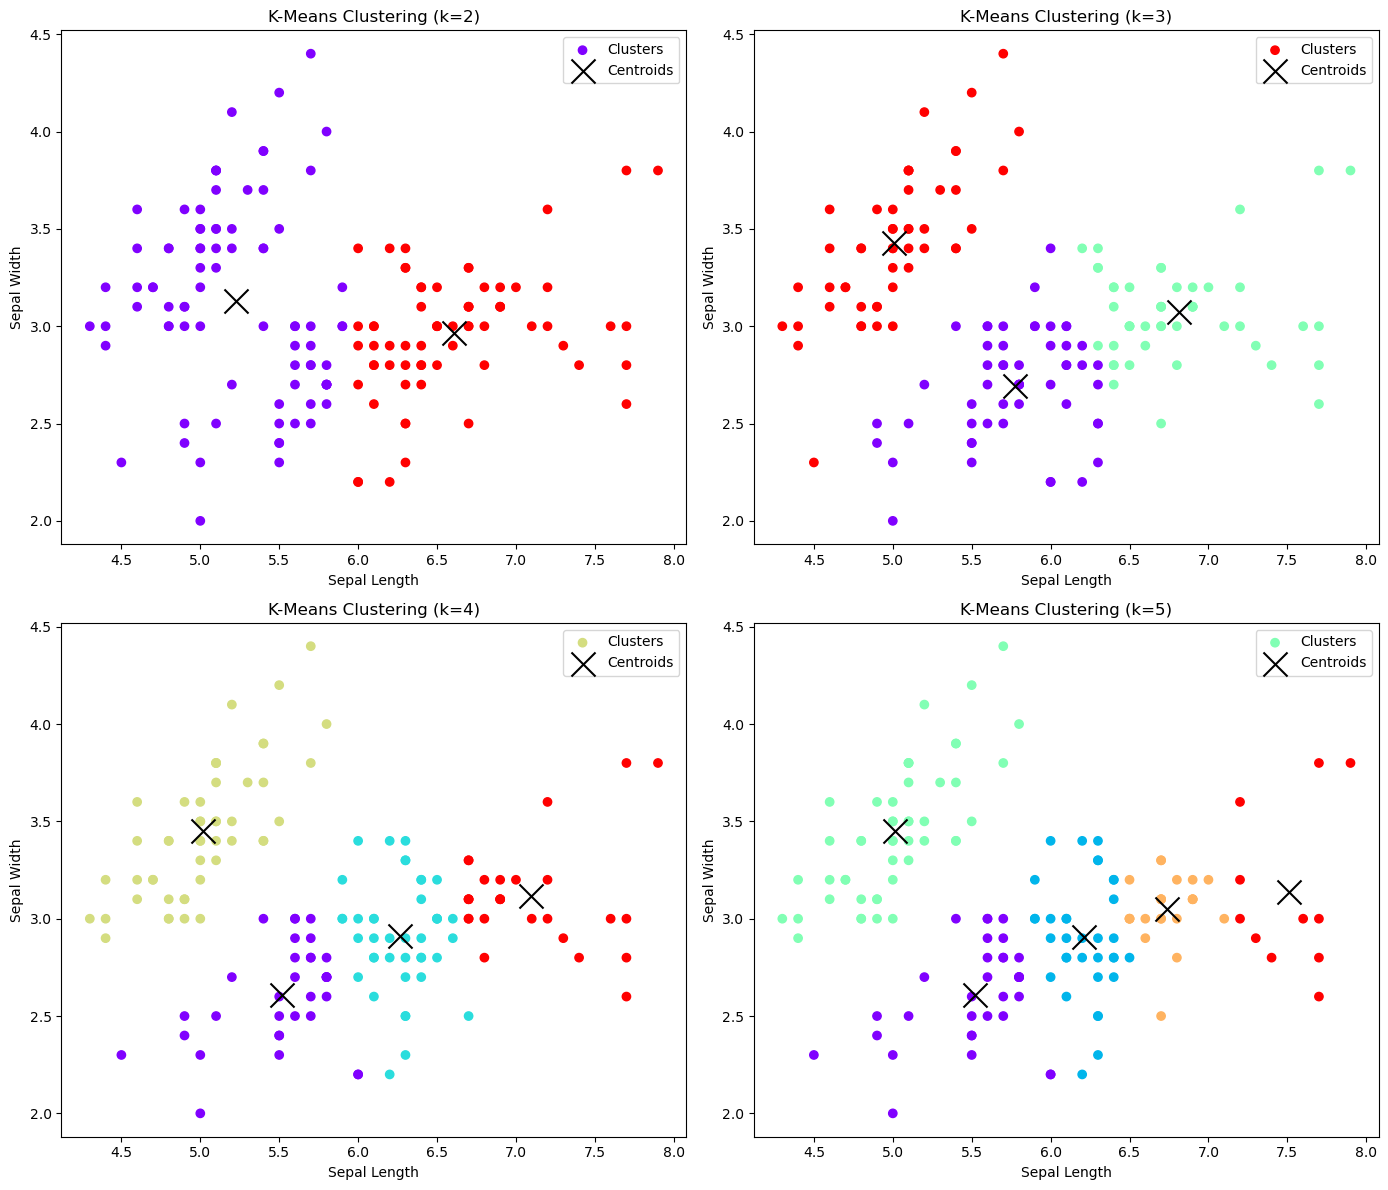

In [14]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Function to plot K-means clusters with cluster centers
def plot_kmeans_clusters(data, k):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans_labels = kmeans.fit_predict(data)
    centers = kmeans.cluster_centers_

    plt.scatter(data[:, 0], data[:, 1], c=kmeans_labels, cmap='rainbow', label='Clusters')
    plt.scatter(centers[:, 0], centers[:, 1], s=300, c='black', marker='x', label='Centroids')
    plt.title(f"K-Means Clustering (k={k})")
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.legend()

# List of k values
k_values = [2, 3, 4, 5]

# Create subplots for different k values
plt.figure(figsize=(14, 12))

for i, k in enumerate(k_values):
    plt.subplot(2, 2, i + 1)
    plot_kmeans_clusters(data, k)

plt.tight_layout()
plt.show()


# Given this output, respond to the following questions:
# 1. Based on the scatter plot of the clustered data, which makes the most sense? Give logical interpretation from the clusters.

Logical Interpretation:

1. Agglomerative Clustering (Ward Linkage):

* k=2: The separation between the two clusters in the scatter plot makes logical sense. The first cluster contains flowers with smaller sepal lengths and wider sepal widths (potentially corresponding to one species), while the second cluster contains flowers with larger sepal lengths and narrower sepal widths. This separation aligns well with how species in the Iris dataset tend to be distributed by these features.
* k=3: The third cluster in this case corresponds to flowers with medium sepal lengths and intermediate sepal widths, indicating the separation of another species. This value of k seems to best fit the expected number of clusters, as the Iris dataset has three species (Setosa, Versicolor, Virginica), and the clusters visually reflect this.
* k=4 and k=5: As we increase k, the clusters become more fragmented, which may not add much additional value. The smaller clusters created at k=4 and k=5 might not be as meaningful as the first few larger clusters at k=2 or k=3.

2. Agglomerative Clustering (Complete Linkage):

* k=2 and k=3: The clusters generated using Complete Linkage are relatively similar in shape to those from Ward Linkage, but the boundaries seem less compact. The data points near the cluster boundaries are less tightly grouped compared to Ward linkage. This method, in some cases, produces slightly more "spread-out" clusters, especially at higher k values, which may not make logical sense if we expect compact, well-separated groups.
* k=4 and k=5: The clusters become overly fragmented at higher k values, and their spread across the feature space suggests overfitting.

K-Means Clustering:

* k=2: Similar to Agglomerative Clustering, K-means with k=2 gives a reasonable separation of the data into two large groups. The clusters are spherical, which aligns well with the K-means assumption of similarly shaped clusters.
* k=3: This appears to be the most logical k value for the K-means method, as it produces three distinct clusters, which matches the actual species count in the Iris dataset. Each cluster is well-separated, and the centroids make sense as they correspond to the centers of the clusters.
* k=4 and k=5: As k increases, the clusters become more fragmented, similar to Agglomerative Clustering. These additional clusters may not add meaningful information beyond what k=3 provided.
  
Which Clustering Makes the Most Sense?

* k=3 appears to be the most logical choice for both clustering methods (Agglomerative and K-means), as the dataset contains three known species, and both methods successfully split the data into three distinct groups when k=3. The clusters reflect well-separated groups of flowers based on sepal length and width.
* K-Means vs. Agglomerative Clustering: The K-means method tends to create spherical clusters, which works well for this dataset as the clusters are relatively compact. On the other hand, Ward linkage in Agglomerative Clustering also does a good job of splitting the data into logical groups, especially at k=3. Ward linkage produces slightly more compact clusters compared to Complete linkage, which results in more spread-out clusters at higher values of k.

Conclusion:
For this dataset, k=3 is the most interpretable and logical value for the number of clusters, as both methods (K-means and Ward linkage in Agglomerative Clustering) clearly distinguish the three species of Iris flowers. Both methods provide good separation, but K-means has the added benefit of identifying cluster centroids, which can help interpret the central tendencies of the clusters.

# 2. Compare the plots and clusters found by euclidean distance and complete linkage.

1. Cluster Formation in Euclidean Distance (Ward Linkage):

* Ward linkage minimizes the variance within clusters, which tends to form more compact, spherical clusters. This method merges clusters based on the smallest increase in within-cluster variance, making the clusters more tightly grouped.

* For k=2 and k=3: The clusters are more compact and have clearer boundaries. For example, in the k=3 case, the clusters are well-separated and align nicely with what one would expect for the three species of Iris flowers. The clusters created by Ward linkage have smaller within-cluster variances, meaning that the points within each cluster are closer to each other. At k=3, Ward linkage produces three distinct clusters, each corresponding to a different species. These clusters are visually well-separated and show minimal overlap between clusters.

* For k=4 and k=5:The clusters remain compact, but as the number of clusters increases, some of the clusters begin to look over-fragmented. However, even at higher values of k, Ward linkage ensures that the clusters are relatively well-formed, with points closely grouped around their centroids.
  
2. Cluster Formation in Complete Linkage:

* Complete linkage, also known as the "farthest neighbor" method, merges clusters based on the maximum distance between points in different clusters. This method tends to create more spread-out, elongated clusters because it focuses on the farthest points when determining which clusters to merge.

* For k=2 and k=3: The clusters are more elongated and less compact compared to Ward linkage. For example, in the k=3 case, while the general cluster structure is similar to Ward linkage, the boundaries between clusters are less defined, with points spread out over a larger area. This spread is especially noticeable in the central cluster, which spans a wide range of values in both sepal length and width.
At k=3, Complete linkage also forms three clusters, but the boundaries are less tight, and the clusters appear more stretched out. The clusters are slightly overlapping near the boundaries, indicating that the farthest points influence the formation of these clusters.
* For k=4 and k=5: As the number of clusters increases, the clusters become even more spread out and less distinct compared to Ward linkage. In the k=4 and k=5 cases, the clusters start to overlap more, and their shapes become more irregular. This suggests that Complete linkage might not be ideal when you need well-separated, compact clusters, especially when increasing the number of clusters.

Key Differences:
1. Cluster Shape and Tightness:
* Ward Linkage (Euclidean Distance): Tends to form tighter, more compact clusters. The clusters are more spherical, and the points within a cluster are more tightly packed, especially for smaller values of k (e.g., k=2 and k=3).
* Complete Linkage: Forms more spread-out, elongated clusters. The clusters tend to be less compact and more irregular in shape, with points spread out over a wider range, especially as k increases.

2. Cluster Boundaries:
* Ward Linkage: The boundaries between clusters are clearer and better defined, resulting in minimal overlap between clusters. This method ensures that the variance within clusters is minimized, producing well-separated clusters.
* Complete Linkage: The boundaries between clusters are less distinct. There is more overlap near the edges of the clusters, and the farthest points between clusters can stretch the boundaries, leading to more diffuse clusters.

3. Performance for Different k:
* Ward Linkage: Performs well at both lower and higher values of k, producing relatively compact clusters even when k increases. The clusters remain interpretable and meaningful.
* Complete Linkage: Tends to produce less compact clusters, especially at higher k values (e.g., k=4, k=5). The clusters become more spread out, and some clusters overlap, making the clustering less interpretable as k increases.

Conclusion:
* Ward linkage (Euclidean Distance) tends to create more compact and interpretable clusters, making it preferable when the goal is to minimize the within-cluster variance and create clearly separated clusters. It is especially effective at lower k values (k=2 and k=3).
* Complete linkage creates more elongated, spread-out clusters with less distinct boundaries. It may not be ideal for datasets where well-separated, compact clusters are desired, especially at higher values of k. This method might be more useful when analyzing clusters that are naturally more spread out or irregular in shape.
For the Iris dataset, Ward linkage (Euclidean distance) provides a more natural and interpretable clustering, especially when k=3, which aligns with the three species in the dataset.

# 3. Compare the scatter plots from Agglomerative and K-Means clustering.

Cluster Shapes and Boundaries:

1. K-Means Clustering:
* Spherical Clusters: K-Means tends to form spherical clusters because it minimizes the distance between points and their nearest centroid. This can be seen clearly in the scatter plots, where the clusters appear relatively circular in shape for all k values (2, 3, 4, and 5).
* Well-Defined Centroids: The K-means algorithm explicitly calculates cluster centroids, which are marked with black 'x' symbols in the plots. These centroids serve as the centers of the clusters and are equidistant to the points within the clusters.
* Equal-Size Clusters: K-means tends to generate clusters of relatively equal size. The method is biased towards balancing the number of data points across clusters, which can sometimes lead to less natural clustering if the true underlying clusters are not of equal size.
* Sensitive to Initial Centroids: The clusters formed by K-means are highly dependent on the initialization of the centroids. Poor initialization can lead to suboptimal clustering results, especially when k is larger than the true number of natural clusters.

2. Agglomerative Clustering (Ward and Complete Linkage):

* Irregular Cluster Shapes: Unlike K-means, Agglomerative Clustering (especially with Ward and Complete Linkage) can form clusters of various shapes, not necessarily spherical. The clusters can be elongated or more irregular, depending on the linkage method and the structure of the data.
Ward Linkage: Generally produces more compact, well-defined clusters, which tend to be closer in shape to K-means clusters but with more flexibility in shape.
Complete Linkage: Results in more spread-out clusters with looser boundaries, allowing for more elongated cluster shapes, especially at higher k values.
* No Explicit Centroids: Agglomerative clustering does not explicitly calculate centroids. Instead, it forms clusters based on a hierarchical approach, which means there is no central point around which the clusters are built. This can make Agglomerative Clustering better suited for datasets where the clusters are not evenly spread or don't have clear centers.
* Hierarchical Structure: The hierarchical nature of Agglomerative Clustering is advantageous because it shows how clusters are nested. This can be useful in exploring the dataset at multiple levels of granularity, unlike K-means, which assigns points to clusters independently for each k value.

Performance for Different k Values:

1. k=2:
* K-Means: The clusters are well-separated and form clear, spherical groups. The centroids are distinct and give a good sense of the overall distribution of the clusters.
* Agglomerative Clustering (Ward and Complete Linkage): The clusters are also well-separated, but they may not be as perfectly spherical as in K-means. In Ward linkage, the clusters are relatively compact and similar in shape to K-means. However, Complete linkage produces more spread-out clusters with less defined boundaries.

2. k=3:
* K-Means: The clusters are well-formed and reflect the underlying three-group structure of the Iris dataset. Each cluster is relatively compact, with a well-defined centroid at its center.
* Agglomerative Clustering (Ward and Complete Linkage): The Ward linkage clusters at k=3 are also well-separated and reflect the natural three-species grouping in the Iris dataset. The clusters are similar to those produced by K-means. However, with Complete linkage, the clusters are more elongated and slightly less compact, resulting in less tight groupings.

3. k=4 and k=5:
* K-Means: As k increases to 4 and 5, K-means still produces compact, spherical clusters, but the clusters become more fragmented. This can lead to some smaller clusters that might not have a meaningful interpretation in the dataset, as K-means tries to balance the number of points in each cluster.
* Agglomerative Clustering (Ward and Complete Linkage): For Ward linkage, the clusters remain relatively compact at k=4 and k=5, though they start to fragment as well. Complete linkage, on the other hand, results in much more elongated and spread-out clusters as k increases, which might make the clusters less interpretable.

Key Differences:

1. Shape of Clusters:
* K-Means: Always tends to create spherical, equally sized clusters, regardless of the underlying data structure. This is due to the centroid-based approach.
* Agglomerative Clustering: Can handle non-spherical clusters better, especially when using Complete linkage, as it does not assume that clusters are evenly spread around a centroid.

2. Flexibility of Cluster Formation:
* K-Means: Relies on the idea that clusters are distributed around centroids and assumes each point belongs to the nearest centroid. This approach is less flexible when the underlying clusters have irregular shapes or distributions.
* Agglomerative Clustering: Is more flexible in forming clusters of different shapes, making it a good choice for datasets where the clusters are not necessarily spherical or of equal size.

3. Centroids vs. Hierarchy:
* K-Means: Explicitly calculates centroids, which can provide a clear, interpretable center for each cluster.
* Agglomerative Clustering: Does not have centroids, but instead builds a hierarchical structure, which provides insights into how clusters are related to one another.

4. Interpretability:
* K-Means: Provides clear-cut, interpretable clusters with centroids, but may struggle with non-spherical cluster shapes or unequal cluster sizes.
* Agglomerative Clustering: Offers more flexibility in cluster shape and structure, but lacks centroids, which can make it harder to interpret for certain datasets. The hierarchical structure can be advantageous for datasets that benefit from multi-level analysis.

Conclusion:

* K-Means Clustering produces clear, spherical clusters with well-defined centroids, which is beneficial when clusters are expected to be evenly distributed and compact. This method works well for the Iris dataset, especially at k=3, where it mirrors the natural species distribution.
* Agglomerative Clustering (especially Ward linkage) performs similarly to K-means in forming compact clusters but offers more flexibility in handling non-spherical shapes. Complete linkage, however, creates more spread-out clusters that might be harder to interpret, especially as k increases.

For the Iris dataset, both methods perform well at k=3, but K-means clustering may offer slightly more interpretable clusters due to its use of centroids. However, Agglomerative Clustering is more flexible and can capture non-spherical clusters better, making it more adaptable to different datasets.